Analyzing 911 Calls and 
[Click here for live site!](https://m-sender.github.io/ServiceLearning)

# **Max Sender and Sam Traylor**

### Data set link: [Calls for service 2021](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2021/3pha-hum9)

What this data set is a collection of 9-1-1 calls in 2021 in the New Orleans Area. This set contains basic things such as the type of incident, where it was, the police department, and timing, and more.

## Questions

#### We find this data set to be very insightful and can answer a lot of different questions. One route we can take is analyzing the data set to focusing on emergency response and answer questions regarding that. If this route is chosen, another dataset that could be of use is [Police Zone Information](https://data.nola.gov/dataset/Police-Zones/fngt-zkj9). This lets us expand our questions to answer more zone and area specific questions. Questions that we can answer going this route are:

*   Average response time by incident?

*   Average response time by zone/area?

*   Average response time by incident in specific areas?

#### Another route we can go with the data is focusing more on the crime aspect of the data set. This route will be more focused on answering questions about crime in specific areas instead of the emergency response.

*   Most frequent crimes in specific areas?

*   Based on the value counts of each type of crime in each area can we generalize patterns like violent crime happening more in one area, theft in another, etc?

*   What are the most frequest crimes by time of day in conjunction with a specific area?

#### There are more routes we can choose from and more questions will come to mind upon further analysis of the datasets. A combination of multiple routes will most likely render the most promising and insightful results.

## Collaboration plan:

We plan to collaborate via meetings over zoom, and store our data in a shared github. Any particular challenges that have to be solved in a pair-programming setting will be dealt with using live share on vscode.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df_Calls_untidy = pd.read_csv("../data/Calls_for_Service_2021.csv")
df_zones_untidy = pd.read_csv("../data/Police_Zones_data.csv")

In [91]:
df_Calls = df_Calls_untidy.drop(columns=['NOPD_Item','Type','InitialType','MapX','MapY','Disposition','Beat'])
#set type to date time objects
df_Calls = df_Calls.astype({'TimeCreate':'datetime64[ns]','TimeDispatch':'datetime64[ns]',"TimeArrive":'datetime64[ns]',"TimeClosed":'datetime64[ns]'})
df_Calls.head(5)

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:40:31,Necessary Action Taken,Y,Vicksburg St & Brooks St,70124,3,POINT (-90.10764787 29.99729994)
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301)
2,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 03:03:53,Necessary Action Taken,Y,Decatur St & Iberville St,None,8,POINT (-90.06636912 29.95282347)
3,FIREWORKS,1A,FIREWORKS,2J,2021-01-01 00:02:13,NaT,NaT,2021-01-01 00:17:36,VOID,N,055XX Sutton Pl,70131,4,POINT (-89.9964721 29.91905338)
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289)


**Columns Explained:**
* TypeText: Type of incident (text)
* Priority: Priority of incident (ID)
* InitialTypeText: Initial type of incident (text)
* InitialPriority: Initial priority of incident (ID)
* TimeCreate: Time of incident
* TimeDispatch: Time of dispatch
* TimeArrive: Time of arrival
* TimeClose: Time of closure
* DispositionText: Disposition of incident (text)
* SelfInitiated: Self-initiated (Y or N)
* BLOCK_ADDRESS: Block address of incident
* Zip: Zip code of incident
* PoliceDistrict: Police district of incident (ID)
* Location: Location of incident (ID)
Each entry in the dataset in a unique call to 911 dispatch with relevant information.


In [92]:
df_zones_untidy.head(5)
df_zones = df_zones_untidy.set_index("OBJECTID")
df_zones

,the_geom,Zone,District,Shape_Length,Shape_Area
OBJECTID,,,,,
1883,MULTIPOLYGON (((-90.066369220964 29.9528235013...,8C,8,6792.167688,2.012343e+06
1855,MULTIPOLYGON (((-90.096467011995 29.9414493437...,6K,6,8518.748545,4.324270e+06
1860,MULTIPOLYGON (((-90.100235367426 29.9209080675...,6P,6,11703.354343,7.651238e+06
1784,MULTIPOLYGON (((-90.108388478789 29.9349666704...,2I,2,14995.498757,1.318799e+07
1847,MULTIPOLYGON (((-90.065506929482 29.9391674081...,6C,6,13163.392602,5.747707e+06
...,...,...,...,...,...
1795,MULTIPOLYGON (((-90.111520545347 29.9527465406...,2U,2,13072.875152,9.234422e+06
1819,MULTIPOLYGON (((-90.058618074754 29.9913549365...,3X,3,19241.277584,1.299197e+07
1827,MULTIPOLYGON (((-90.040725013307 29.9469852425...,4G,4,14627.126145,1.251777e+07


* the_geom: Polygon defining the zone in question
* OBJECTID: ??
* Zone: The police zone
* District: The district within the zone
* Shape_Length: The perimeter of the zone
* Share_Area: The the area inside of the zone

In [93]:
#Using that same response time column, we could look at the means across different areas (using the police district or zip column of this dataset)
#Using the results of the last question, we could further specify the avergage response time across incident type column values AND area column values.
#Using zone information and response time, determine "holes" in the zones where response time is higher than the norm or where the area has an increase in crime due to the response times.
#Get the value counts of each different crime for each time of day (we could categorize into several-hour windows like afternoon, evening, night, late night)
#We could use measures of variance like the standard deviation from average response time, which would allow us to identify 'holes' wherever the response time is far higher than average.
df_Calls["responseTime"] = df_Calls.TimeArrive - df_Calls.TimeDispatch

print("Maximum response time: ", df_Calls.responseTime.max())
print("Mean response time: ", df_Calls.responseTime.mean(), "\n") 

mean_by_zone = df_Calls.groupby(["PoliceDistrict"])
for group in mean_by_zone:
    print("Average response time in District", group[0], ": ", group[1].responseTime.mean())

Maximum response time:  3 days 01:03:27
Mean response time:  0 days 00:07:25.337898940 

Average response time in District 0 :  0 days 00:01:41.973818897
Average response time in District 1 :  0 days 00:05:06.351330066
Average response time in District 2 :  0 days 00:05:16.703492640
Average response time in District 3 :  0 days 00:06:06.488485002
Average response time in District 4 :  0 days 00:04:39.301870286
Average response time in District 5 :  0 days 00:10:17.055669488
Average response time in District 6 :  0 days 00:06:46.087743686
Average response time in District 7 :  0 days 00:17:39.748573240
Average response time in District 8 :  0 days 00:05:24.510218716



*   Most frequent crimes in specific areas?

*   Based on the value counts of each type of crime in each area can we generalize patterns like violent crime happening more in one area, theft in another, etc?

*   What are the most frequest crimes by time of day in conjunction with a specific area?

In [138]:
#using df_Calls, find the most common crimes for each police district
#here lets make tables and stuff by grouping by zones, type of incidents, and other things that answer our question
#we should be good after this and then in our plan we can say we will be making a map of the data we find and then graphs and such of data stuff than cant be mapped

#Get 30 most frequent crimes
new_df = df_Calls.TypeText.value_counts()
top_Call_df = df_Calls[df_Calls.TypeText.isin(new_df[0:29].index)]



type_by_district = top_Call_df[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
type_by_zipcode = top_Call_df[['Zip','TypeText']].pivot_table(index=['Zip'],columns=['TypeText'],aggfunc=np.count_nonzero)
#'''df_Calls_crossTab = pd.crosstab(df_Calls['PoliceDistrict'],df_Calls['TypeText'])
#display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot(kind='bar',stacked=True, legend=False))
#type_by_district.plot(kind='bar', stacked=True, legend=False) #need to convert to marginal distribution for comparison'''

type_by_district.T[0].max()
df_Calls_marg_district = type_by_district.T / type_by_district.T.sum()
df_Calls_marg_zip = type_by_zipcode.T / type_by_zipcode.T.sum()
pop_district = type_by_district.T.idxmax()
pop_zip = type_by_zipcode.T.idxmax()
type_by_district_with_freq =  pd.merge(type_by_district, pop_district.rename('Most Frequent'), 'outer',on='PoliceDistrict')
type_by_zipcode_with_freq = pd.merge(type_by_zipcode, pop_zip.rename('Most Frequent'), 'outer',on='Zip')






Most Frequent Crimes by District:
PoliceDistrict
0         AREA CHECK
1         AREA CHECK
2         AREA CHECK
3         AREA CHECK
4         AREA CHECK
5    COMPLAINT OTHER
6    COMPLAINT OTHER
7    COMPLAINT OTHER
8    COMPLAINT OTHER
dtype: object


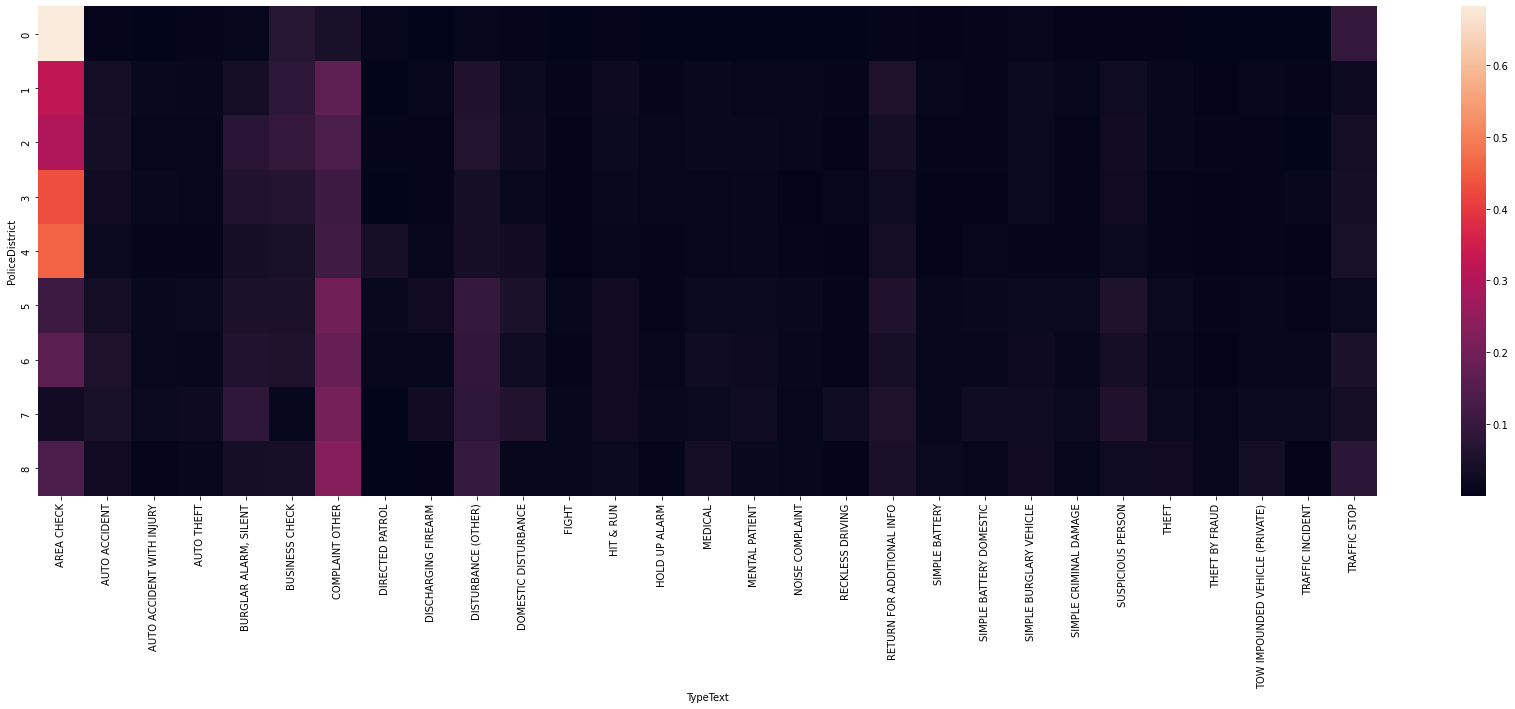

In [142]:
ax = plt.subplots(figsize=(30,9))
print("Most Frequent Crimes by District:")
print(pop_district)
heat_map_districts_marginal = sns.heatmap(df_Calls_marg_district.T)

Most Frequent Crimes by Zipcode:
Zip
70112    COMPLAINT OTHER
70113    COMPLAINT OTHER
70114         AREA CHECK
70115         AREA CHECK
70116    COMPLAINT OTHER
70117    COMPLAINT OTHER
70118         AREA CHECK
70119         AREA CHECK
70122    COMPLAINT OTHER
70124         AREA CHECK
70125         AREA CHECK
70126    COMPLAINT OTHER
70127    COMPLAINT OTHER
70128    COMPLAINT OTHER
70129    COMPLAINT OTHER
70130    COMPLAINT OTHER
70131         AREA CHECK
70148         AREA CHECK
None          AREA CHECK
dtype: object


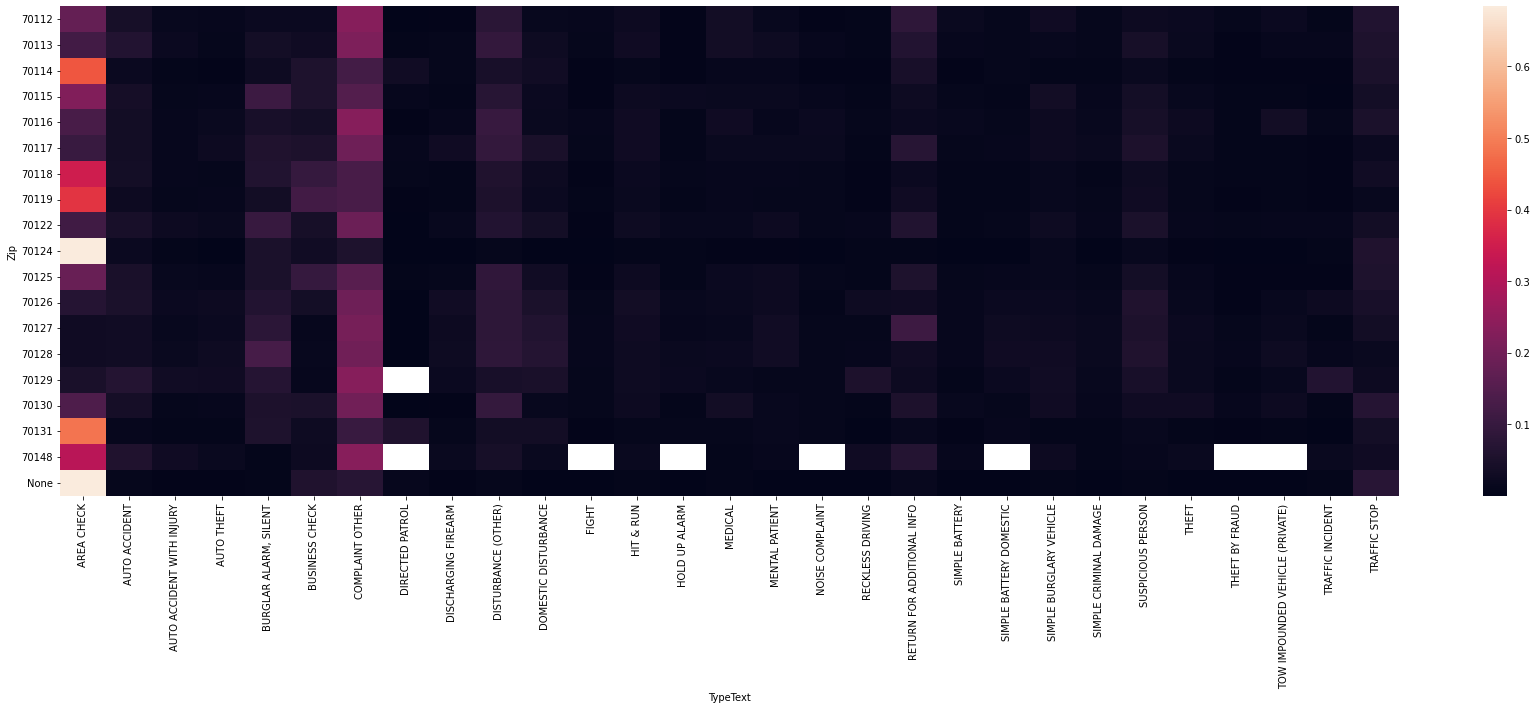

In [141]:
ax = plt.subplots(figsize=(30,9))
print("Most Frequent Crimes by Zipcode:")
print(pop_zip)
heat_map_zipcodes_marginal = sns.heatmap(df_Calls_marg_zip.T)
    

In [143]:
#Condtional
type_by_district = top_Call_df[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
type_by_zipcode = top_Call_df[['Zip','TypeText']].pivot_table(index=['Zip'],columns=['TypeText'],aggfunc=np.count_nonzero)
df_Calls


,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,responseTime
0,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:40:31,Necessary Action Taken,Y,Vicksburg St & Brooks St,70124,3,POINT (-90.10764787 29.99729994),0 days 00:00:00
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),0 days 00:04:02
2,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 03:03:53,Necessary Action Taken,Y,Decatur St & Iberville St,None,8,POINT (-90.06636912 29.95282347),0 days 00:00:00
3,FIREWORKS,1A,FIREWORKS,2J,2021-01-01 00:02:13,NaT,NaT,2021-01-01 00:17:36,VOID,N,055XX Sutton Pl,70131,4,POINT (-89.9964721 29.91905338),NaT
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289),NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353263,MISSING ADULT,1C,MISSING ADULT,1C,2021-10-21 23:30:17,NaT,NaT,2021-10-22 00:09:50,VOID,N,049XX Treves St,70129,7,POINT (-89.91440911 30.04029447),NaT
353264,NOISE COMPLAINT,1G,NOISE COMPLAINT,1G,2021-10-21 00:45:24,2021-10-21 01:08:14,2021-10-21 01:16:49,2021-10-21 01:23:44,Necessary Action Taken,N,078XX Plum St,70118,2,POINT (-90.12684511 29.94647035),0 days 00:08:35
353265,AREA CHECK,1K,AREA CHECK,1K,2021-10-21 03:26:37,NaT,2021-10-21 03:26:37,2021-10-21 03:58:39,Necessary Action Taken,Y,026XX General De Gaulle Dr,70114,4,POINT (-90.03167551 29.92986047),NaT
353266,AREA CHECK,1K,AREA CHECK,1K,2021-10-21 03:32:36,NaT,2021-10-21 03:32:36,2021-10-21 04:39:29,Necessary Action Taken,Y,Fleur De Lis Dr & 36th St,70124,3,POINT (-90.11834449 30.01235667),NaT
